In [9]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
df = pd.read_csv('/Users/dennis_m_jose/Downloads/categorical_data.csv')
df

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [3]:
#copt the dataframe df to a new variable data
data = df.copy()
data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [4]:
#map the values of attendance column to 0s and 1s. YES=>1 and NO=>0
data['Attendance'] = data['Attendance'].map({'Yes':1, 'No':0})

In [5]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [7]:
#see the summary of the data
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


<h4>Here we see that the mean of the attendance is less than 0.5 which means that the number of students who does not have 75% is more than the number of students who have 75% attendance. To be precise only 46% of the class have only 75% of attendance.

In [10]:
#create a linear regresion model
Y = data['GPA']
x1 = data[['SAT','Attendance']]

x = sm.add_constant(x1)

#fit the model using OLS method of regression
regression = sm.OLS(Y,x).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           2.19e-15
Time:                        20:36:07   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

here the SAT score and Attendance value are significant since the p value is 0.000.<br>At the same time the adj R-squared value is 0.555 which is higher than which we got before using only SAT score.<br>
Without using attendance our GPA was calculated as:<br><br>
GPA = 0.275 + 0.0017*SAT<br><br>
Now after using attendance as a dependent variable attendance:<br><br>
GPA = .6439 + 0.0014*SAT + .2226*Attendance


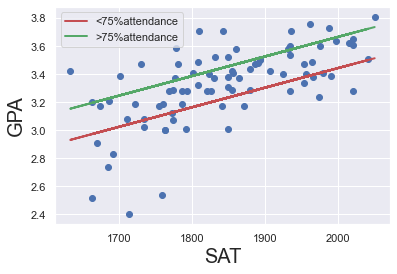

In [25]:
plt.scatter(data['SAT'],Y)
Y_No = .6439 + 0.0014*data['SAT'] + .2226*0
Y_yes = .6439 + 0.0014*data['SAT'] + .2226*1
fig = plt.plot(data['SAT'],Y_No,c='r',lw=2,label = '<75%''attendance')
fig = plt.plot(data['SAT'],Y_yes,c='g',lw = 2,label = '>75%''attendance')

plt.xlabel('SAT',fontsize = 20)
plt.ylabel('GPA',fontsize = 20)

plt.legend()

while observing the graph we see that both the plots have same slope but different intercepts. The one with more than 75% attendance is 0.2226 above the one with <75% attendance.<br><br>
We can interpret this as students who have attendance >75% have their GPA of .2226 more than the students who have attendance less than 75%.

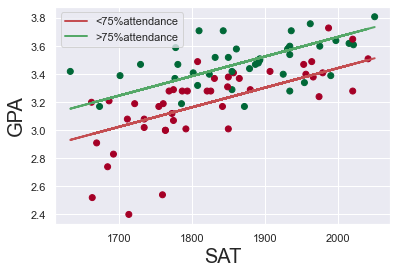

In [30]:
plt.scatter(data['SAT'],Y,c = data['Attendance'],cmap = 'RdYlGn')
Y_No = .6439 + 0.0014*data['SAT'] + .2226*0
Y_yes = .6439 + 0.0014*data['SAT'] + .2226*1

fig = plt.plot(data['SAT'],Y_No,c='r',lw=2,label = '<75%''attendance')
fig = plt.plot(data['SAT'],Y_yes,c='g',lw = 2,label = '>75%''attendance')

plt.xlabel('SAT',fontsize = 20)
plt.ylabel('GPA',fontsize = 20)

plt.legend()

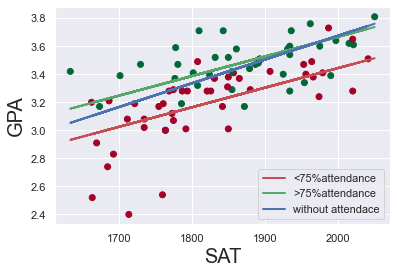

In [34]:
plt.scatter(data['SAT'],Y,c = data['Attendance'],cmap = 'RdYlGn')
Y_No = .6439 + 0.0014*data['SAT'] + .2226*0
Y_yes = .6439 + 0.0014*data['SAT'] + .2226*1
Y_original = 0.275 + 0.0017*data['SAT']

fig = plt.plot(data['SAT'],Y_No,c='r',lw=2,label = '<75%''attendance')
fig = plt.plot(data['SAT'],Y_yes,c='g',lw = 2,label = '>75%''attendance')
fig = plt.plot(data['SAT'],Y_original,c='b',lw = 2, label = 'without attendace')


plt.xlabel('SAT',fontsize = 20)
plt.ylabel('GPA',fontsize = 20)

plt.legend()